<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house_csv = pd.read_csv("/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Labs/DATA/Sacramento_transactions.csv")

In [4]:
house_csv

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [5]:
house_csv.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
#The target variable is the price. This is the test data set for house prices that we are using to predict.

#### 2.2 List all possible variables which might be Predictor variable.

In [7]:
# ANSWER
# beds,baths,sq_ft,city,state or latitude and longitude. 

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [7]:
# ANSWER
house_csv.corr()
#What is the closet to value 1.00000 is considered the best predictor which is the number of bathrooms.
#But the sq_ft makes more sense. So choosing sq_ft as the best predictor.

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [44]:
# ANSWER
house_csv['price'].mean()
#This is the baseline model

234144.26395939087

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [ ]:
# ANSWER
#The difference between the actual value or observed value and the predicted value is called the residual in regression analysis.
# The difference between the actual and the predicted value is the residual which is defined as:

# e=y-y^

# Here, e is the residual, y is the observed or actual value and y^ is the predicted value.
# Each actual value has a predicted value and hence each data point has one residual. 
#If the difference between the actual value and the predicted value is positive, then the data points are above the regression line. 
#If the difference between the actual value and the predicted value is negative, then the data points are below the regression line. If the difference is zero, then that data points lie on the regression line.

In [45]:
residual= house_csv['price']-house_csv['price'].mean()
residual

0     -174922.263959
1     -165932.263959
2     -165264.263959
3     -164837.263959
4     -152244.263959
           ...      
980     -1719.263959
981      -144.263959
982       855.736041
983      1156.736041
984      1593.736041
Name: price, Length: 985, dtype: float64

In [46]:
residual.mean()

-1.1399246487520673e-10

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

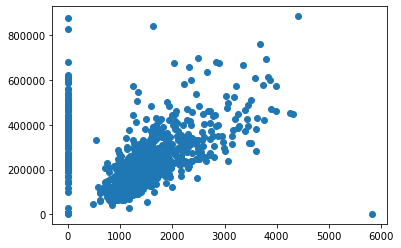

In [47]:
# ANSWER
x=house_csv['sq__ft']
y=house_csv['price']
plt.scatter(x,y)

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [48]:
# ANSWER
y_=house_csv['price'].mean()
x_=house_csv['sq__ft'].mean()
a=house_csv['sq__ft']-x_#x-x_
e=house_csv['price']-y_#y-y_
a,e
beta1= sum(e*a)/sum(a**2)
beta1

54.15863968853089

In [49]:
e*a

0      8.377320e+07
1      2.454416e+07
2      8.575839e+07
3      7.630593e+07
4      7.884985e+07
           ...     
980   -1.659233e+06
981   -2.338277e+04
982   -8.464663e+04
983    4.280886e+05
984    7.503827e+04
Length: 985, dtype: float64

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [50]:
# ANSWER
beta0=y_-beta1*x_
beta0

162930.1614069976

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [51]:
# ANSWER
y_p= beta0+beta1*x
y_p

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [52]:
# ANSWER
residual_i=y-y_p
residual_i

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [53]:
# ANSWER
def r_sq(residual_i,e):
    SSres=residual_i**2
    SStot=e**2
    R_sq=1-(SSres/SStot)
    return R_sq

r_sq(residual_i,e)  

0         0.274573
1         0.094226
2         0.311189
3         0.281057
4         0.334538
          ...     
980    -985.032017
981   -3824.205000
982     -51.712505
983    -265.583349
984       0.640010
Length: 985, dtype: float64

##### 2.7.F [BONUS] Draw Plot of Predicted Line

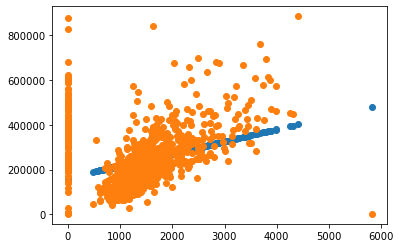

In [54]:
# ANSWER
plt.scatter(x,y_p)
plt.scatter(x,y)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [37]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [55]:
# ANSWER
x1=1204
y_p= beta0+beta1*x1
y_p


228137.1635919888



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



